In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Model

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype("float32") / 255

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
def create_cnn_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.Flatten(),
        layers.Dense(64, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    return model

In [4]:
model = create_cnn_model()
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 69s 36ms/step - accuracy: 0.8951 - loss: 0.3333 - val_accuracy: 0.9860 - val_loss: 0.0478
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 33ms/step - accuracy: 0.9835 - loss: 0.0506 - val_accuracy: 0.9875 - val_loss: 0.0386
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 32ms/step - accuracy: 0.9888 - loss: 0.0357 - val_accuracy: 0.9900 - val_loss: 0.0322
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 32ms/step - accuracy: 0.9922 - loss: 0.0239 - val_accuracy: 0.9913 - val_loss: 0.0271
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.9947 - loss: 0.0169 - val_accuracy: 0.9917 - val_loss: 0.0273


In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 279,968 (1.07 MB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 186,646 (729.09 KB)

In [10]:
layer = model.get_layer('conv2d')
print(layer)
filters, biases = layer.get_weights()
print(filters, biases)

<Conv2D name=conv2d, built=True>
[[[[-1.04204647e-01 -3.02868545e-01  1.35734990e-01  1.03158383e-02
    -4.65222672e-02 -1.55217141e-01 -3.28382328e-02  4.40000929e-02
     1.32784992e-01  2.08211049e-01 -6.30643368e-02 -1.53409541e-01
     1.82303697e-01  1.97862804e-01  4.82502393e-02 -2.79728621e-01
     2.51442976e-02 -1.02119647e-01 -1.14638269e-01  4.96979803e-03
    -3.74723673e-01  1.60247758e-01  7.94955194e-02  2.00014651e-01
    -3.55702072e-01 -5.45151308e-02  8.07342976e-02 -8.09620600e-03
     1.67271629e-01  6.45086244e-02 -1.44567207e-01 -5.05500585e-02]]

  [[ 7.77134448e-02 -2.12107375e-02  9.75799337e-02  8.92030597e-02
     1.71070725e-01 -1.00850672e-01 -1.96571484e-01 -2.29990780e-02
     2.95304731e-02 -3.37601155e-01 -2.42065325e-01 -1.20345913e-01
     3.76603624e-04  2.40446404e-02  1.40228942e-01 -3.52860913e-02
    -2.03860268e-01 -5.02820164e-02  9.32616368e-02 -6.11632988e-02
    -3.18305105e-01  2.16376528e-01  3.31750140e-02  3.12035382e-02
    -4.14009

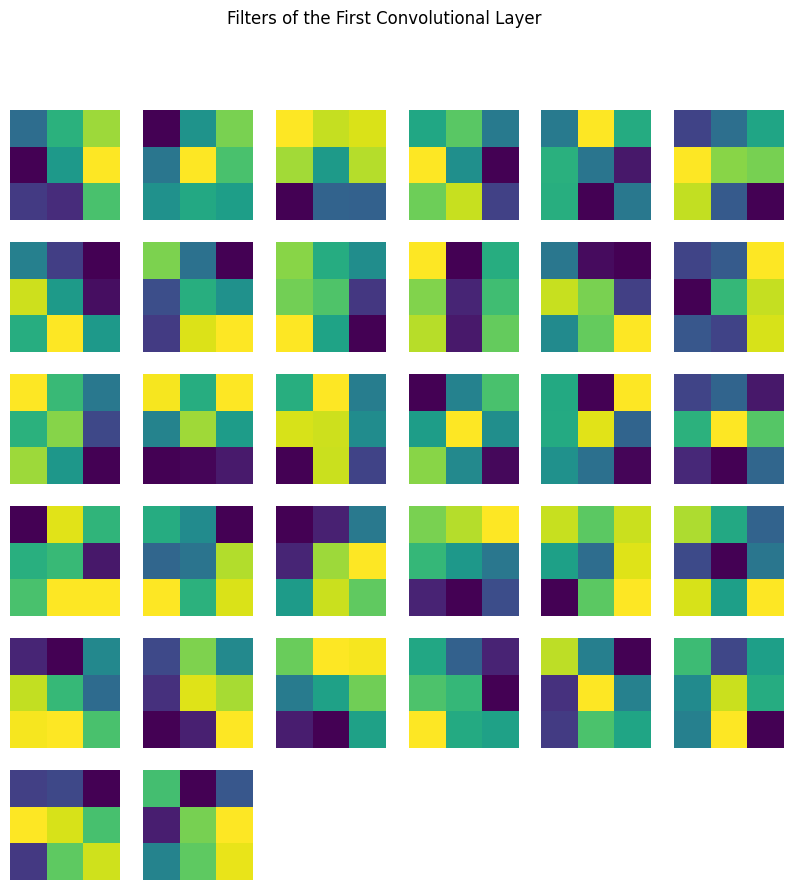

In [13]:
def visualize_layer(layer_name):
    layer = model.get_layer(layer_name)
    filters, biases = layer.get_weights()

    # Normalize filter values for visualization
    f_min, f_max = filters.min(), filters.max()
    filters = (filters - f_min) / (f_max - f_min)

    n_filters = filters.shape[-1]
    plt.figure(figsize=(10, 10))
    for i in range(n_filters):
        plt.subplot(6, 6, i+1)
        plt.imshow(filters[:, :, 0, i], cmap="viridis")
        plt.axis("off")
    plt.suptitle("Filters of the First Convolutional Layer")
    plt.show()

visualize_layer('conv2d')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


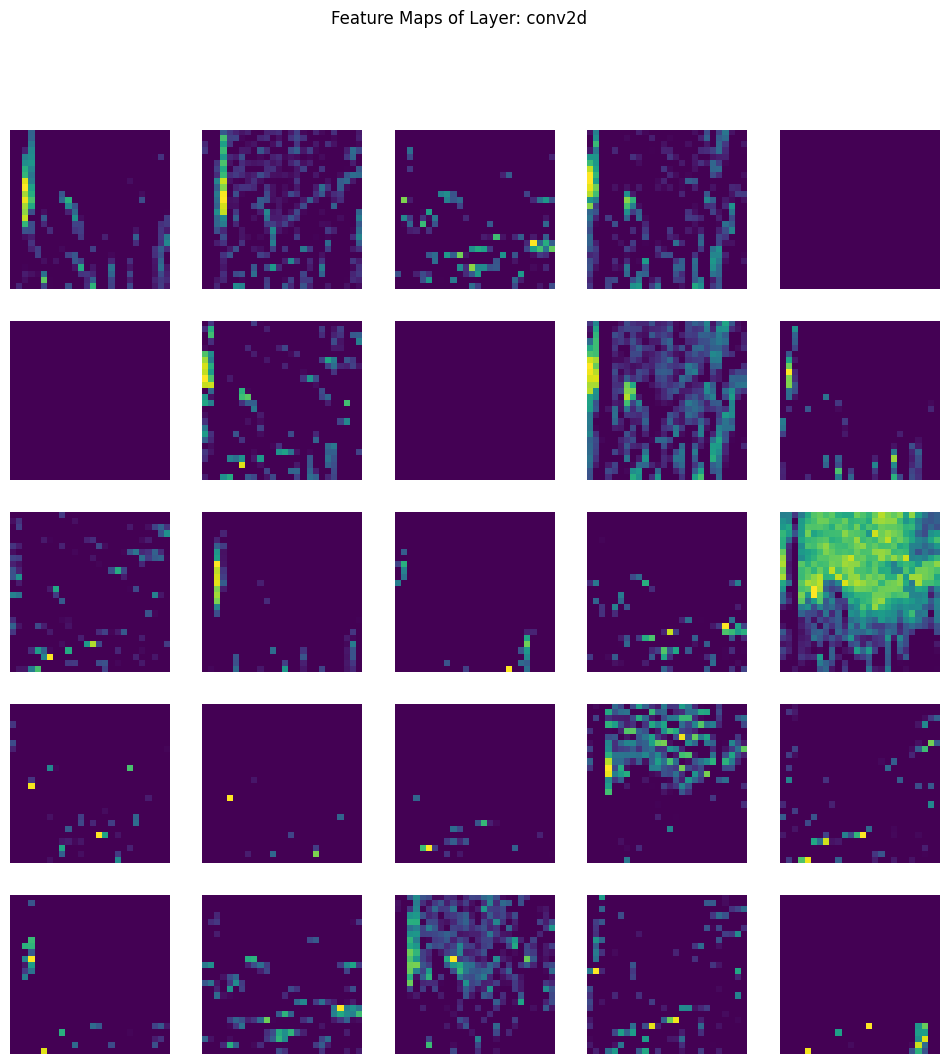

In [19]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model

def visualize_feature_maps(layer_name, image_path):
    image = load_img(image_path, target_size=(28, 28), color_mode="grayscale")
    image = img_to_array(image)/ 255.0
    image = image.reshape(1, 28, 28, 1)

    layer_output = model.get_layer(layer_name).output
    feature_map_model = Model(inputs=model.inputs, outputs=layer_output)
    feature_maps = feature_map_model.predict(image.reshape(1, 28, 28, 1))

    n_features = min(feature_maps.shape[-1], 25)
    square = int(np.ceil(np.sqrt(n_features)))

    plt.figure(figsize=(12, 12))
    for i in range(n_features):
        plt.subplot(square, square, i + 1)
        plt.imshow(feature_maps[0, :, :, i], cmap='viridis')
        plt.axis("off")
    plt.suptitle(f"Feature Maps of Layer: {layer_name}")
    plt.show()

visualize_feature_maps('conv2d', '/content/church.jpg')
